<a href="https://colab.research.google.com/github/Bhavana-sl/Co2-emission-project/blob/main/co2footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 290.7375470217717


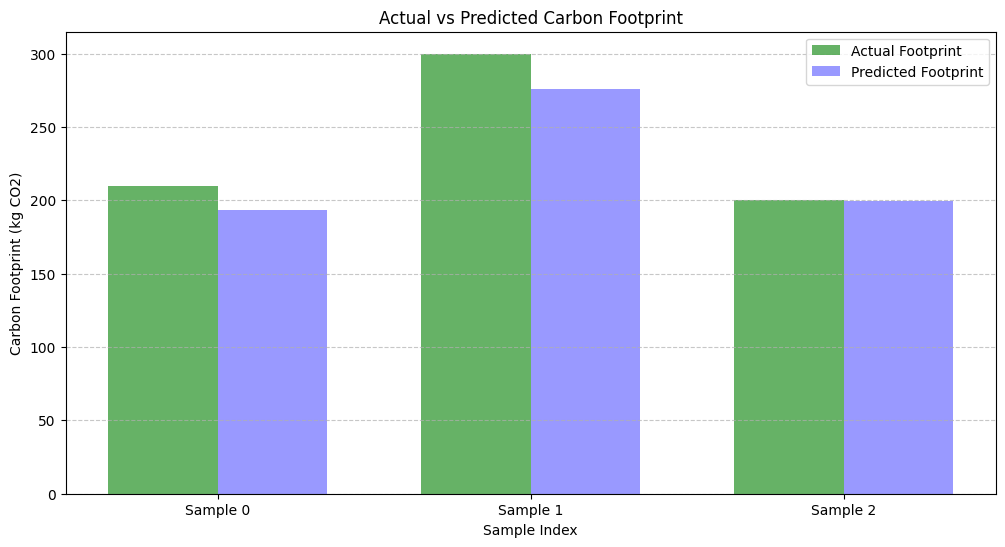

Predicted Carbon Footprint: 294.58 kg CO2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load a dataset with more complexity (introducing noise and varied data)
data = {
    "transport_emissions": [120, 80, 100, 200, 150, 90, 50, 300, 250, 170, 95, 280],  # in kg CO2
    "diet_emissions": [50, 60, 55, 40, 70, 45, 50, 90, 85, 65, 60, 75],  # in kg CO2
    "waste_emissions": [30, 40, 35, 20, 45, 25, 30, 60, 50, 45, 40, 55],  # in kg CO2
    "carbon_footprint": [200, 180, 190, 260, 265, 160, 130, 450, 390, 300, 210, 400]  # total in kg CO2
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features and target
X = df.drop("carbon_footprint", axis=1)
y = df["carbon_footprint"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features to reduce resource consumption during training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a lightweight model (Linear Regression)
model = LinearRegression()

# Train the model efficiently
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize actual vs predicted carbon footprint with side-by-side bars
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(y_test))

plt.bar(indices, y_test.values, bar_width, color='green', alpha=0.6, label='Actual Footprint')
plt.bar(indices + bar_width, y_pred, bar_width, color='blue', alpha=0.4, label='Predicted Footprint')

plt.title('Actual vs Predicted Carbon Footprint')
plt.xlabel('Sample Index')
plt.ylabel('Carbon Footprint (kg CO2)')
plt.xticks(indices + bar_width / 2, [f'Sample {i}' for i in range(len(y_test))])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Predicting Carbon Footprint for new data
def predict_carbon_footprint(transport_emissions, diet_emissions, waste_emissions):
    new_data = np.array([[transport_emissions, diet_emissions, waste_emissions]])
    new_data_scaled = scaler.transform(new_data)
    prediction = model.predict(new_data_scaled)
    return prediction[0]

# Example prediction
new_prediction = predict_carbon_footprint(180, 70, 50)
print(f"Predicted Carbon Footprint: {new_prediction:.2f} kg CO2")

# New section